# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('House Prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


 Question 1.1: Drop the Id column as it is not needed for prediction

In [2]:
if 'Id' in data:
  del data['Id']
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


 Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

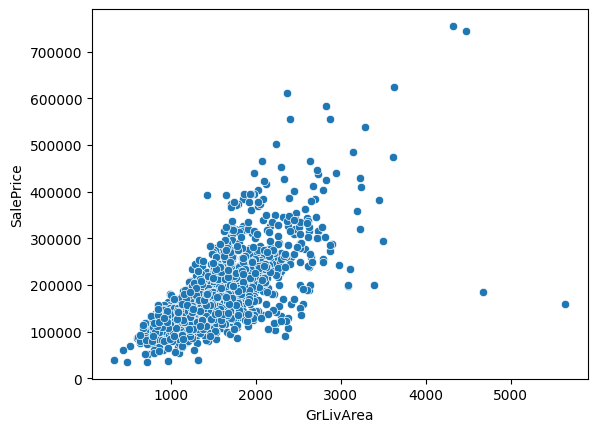

In [3]:
import matplotlib.pyplot as plt

# Looks like GrLivArea is string, let's convert it to float

display(sns.scatterplot(x='GrLivArea', y='SalePrice', data=data))


 Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

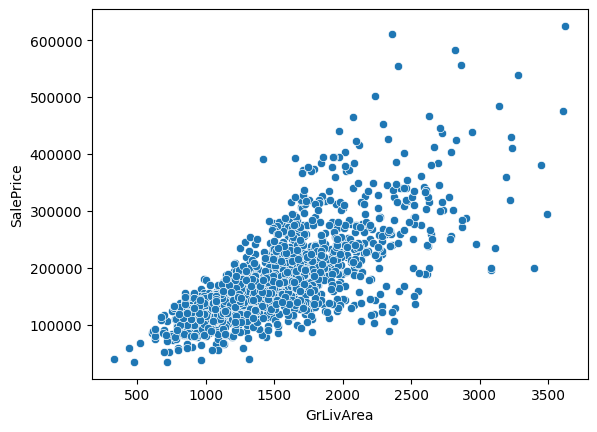

In [4]:
# Remove outliers for data['GrLivArea']>4000
data = data[data['GrLivArea'] <= 4000]

#To Do Create a scatter plot
display(sns.scatterplot(x='GrLivArea', y='SalePrice', data=data))


Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API


In [5]:
data = pd.get_dummies(data)
print("\n".join(data.columns))

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighbo

Question 2.2: Impute missing data by the median of each column.

In [6]:
data = data.fillna(data.median())

Question 2.2b: Make sure that there are no null values remaining

In [7]:
data.notna().all()

MSSubClass               True
LotFrontage              True
LotArea                  True
OverallQual              True
OverallCond              True
                         ... 
SaleCondition_AdjLand    True
SaleCondition_Alloca     True
SaleCondition_Family     True
SaleCondition_Normal     True
SaleCondition_Partial    True
Length: 287, dtype: bool

Question 2.3: Generate train test split 70/30. Set random_state=42

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis=1), data['SalePrice'], test_size=0.3, random_state=42)

Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [31]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

#Fit a linear regression model to this data
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [33]:
#Compute the RMSE 

y_pred = regression.predict(X_test)
print("Coefficients: \n", regression.coef_)
print("RMSE: %.4f" % root_mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

# Alternatively
print("Coefficient of determination: %.4f" % regression.score(X_test, y_test))

Coefficients: 
 [-7.13572825e+01 -7.10288734e+01  6.53355801e-01  3.85854156e+03
  4.04671555e+03  2.97040823e+02 -9.53771329e+00  1.32583624e+01
  1.40436457e+01 -8.17968012e+00  8.79034597e+00  1.46542149e+01
  4.10402013e+00  1.95583759e+01 -1.46242960e+01  9.03778885e+00
  5.36191019e+01  1.88597556e+03  4.15384667e+03  1.88171355e+03
 -8.73728323e+03 -2.90313287e+04  6.80507682e+03 -7.58297528e+02
 -1.19970067e+02 -9.52256349e+02  9.16109860e+00  9.19030893e+00
  8.87359972e+00  1.45212375e+01  6.95651138e+01  4.56361372e+00
  2.42830948e+00 -2.38632725e+00  6.50356540e+02 -5.82177769e+01
 -6.91143991e+04 -5.27567283e+04 -7.25977132e+04 -6.66899962e+04
 -7.46803939e+04 -7.95648488e+03  7.95648488e+03 -2.11491989e+03
 -5.25545867e+03 -2.10573437e+03  9.49884950e+03 -1.26031137e+04
  5.20999856e+03  2.44990493e+03 -7.78412601e+03  3.91421790e+03
  1.42000318e+03  2.30893420e-08 -8.79572326e-09 -2.21214773e+03
  5.48506846e+03  1.04210989e+03 -1.94616740e+03 -2.36886322e+03
  1.00084

We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [34]:
from sklearn import linear_model

alpha = 10**-6 # the same as 0.000001

# 1) We can take a look at the coefficients of the model. Apparently max_iter is too low to reach cvonvergence.
lasso_regression = linear_model.Lasso(alpha=alpha, max_iter=10**4)
lasso_regression.fit(X_train, y_train)


# Compute the RMSE, we can also look at how well the model fits the training data
lasso_pred = lasso_regression.predict(X_test)
print("Coefficients: \n", lasso_regression.coef_)
print("RMSE: %.4f" % root_mean_squared_error(y_test, lasso_pred))
print("Coefficient of determination: %.4f" % r2_score(y_test, lasso_pred))

# Alternatively
print("Coefficient of determination: %.4f" % lasso_regression.score(X_test, y_test))

# 2) We can also see the mean squared errors between the predictions, i.e. how far the predictions are from each other.
print("Root mean square error between the predictions: %.4f" % root_mean_squared_error(y_pred, lasso_pred))

Coefficients: 
 [-7.13572822e+01 -7.10288749e+01  6.53355808e-01  3.85854143e+03
  4.04671568e+03  2.97040823e+02 -9.53771226e+00  1.32583620e+01
  1.95211522e+01 -2.70217243e+00  1.42678523e+01  9.17670807e+00
  8.56767221e+00  2.40220271e+01 -1.01606455e+01  4.57413755e+00
  5.36190968e+01  1.88597543e+03  4.15384673e+03  1.88171323e+03
 -8.73728325e+03 -2.90313291e+04  6.80507673e+03 -7.58297587e+02
 -1.19970082e+02 -9.52256173e+02  9.16109810e+00  9.19030850e+00
  8.87360030e+00  1.45212355e+01  6.95651119e+01  4.56361355e+00
  2.42830763e+00 -2.38632716e+00  6.50356527e+02 -5.82177510e+01
 -6.91143764e+04 -5.27567124e+04 -7.25976965e+04 -6.66899803e+04
 -7.46803783e+04 -1.59129742e+04  7.19976853e-08 -2.11491991e+03
 -5.25545899e+03 -7.39120601e+03  4.21337764e+03 -1.78885845e+04
 -7.54730847e+01  1.15316692e+03 -9.08086328e+03  2.61748063e+03
  1.23265618e+02  0.00000000e+00  0.00000000e+00 -3.44783410e+02
  7.35243230e+03  2.90947331e+03 -7.88029875e+01 -5.01499215e+02
  5.80960

/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+12, tolerance: 6.298e+08
  model = cd_fast.enet_coordinate_descent(


Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [48]:
alpha_vals = np.arange(0.01, 5, 0.01)  # values of alpha we want to iterate over
coefficient_names = X_test.columns.tolist()

linreg_result = pd.DataFrame(
    columns=["intercept"]
    + coefficient_names
    + ["RMSE_train", "R^2_train", "RMSE_test", "R^2_test"]
)

linreg_result.loc[0] = (
    [regression.intercept_]
    + regression.coef_.tolist()
    + [
        root_mean_squared_error(y_train, regression.predict(X_train)),
        r2_score(y_train, regression.predict(X_train)),
    ]
    + [root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
)

lasso_results = pd.DataFrame(columns=["alpha"] + linreg_result.columns.tolist())

for (index, alpha) in enumerate(alpha_vals):
    lasso_regression = linear_model.Lasso(alpha=alpha)
    lasso_regression.fit(X_train, y_train)
    lasso_pred = lasso_regression.predict(X_test)

    lasso_results.loc[index] = (
        [alpha]
        + [lasso_regression.intercept_]
        + lasso_regression.coef_.tolist()
        + [
            root_mean_squared_error(y_train, lasso_regression.predict(X_train)),
            r2_score(y_train, lasso_regression.predict(X_train)),
        ]
        + [root_mean_squared_error(y_test, lasso_pred), r2_score(y_test, lasso_pred)]
    )


/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+12, tolerance: 6.298e+08
  model = cd_fast.enet_coordinate_descent(
/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+12, tolerance: 6.298e+08
  model = cd_fast.enet_coordinate_descent(
/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

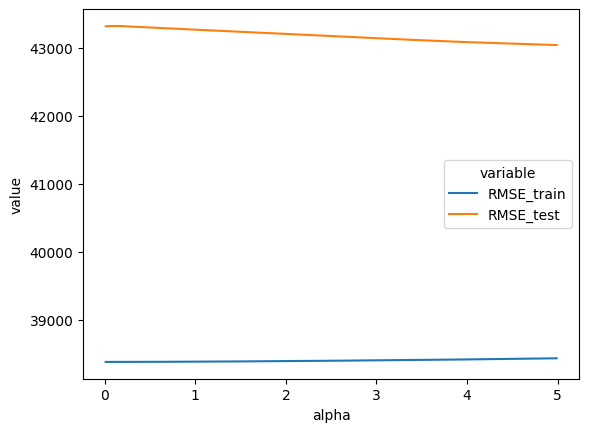

In [59]:
rmse = sns.lineplot(
    x="alpha",
    y="value",
    data=pd.melt(
        lasso_results, ["alpha"], ["RMSE_train", "RMSE_test"]
    ),
    legend="full",
    hue="variable",
)

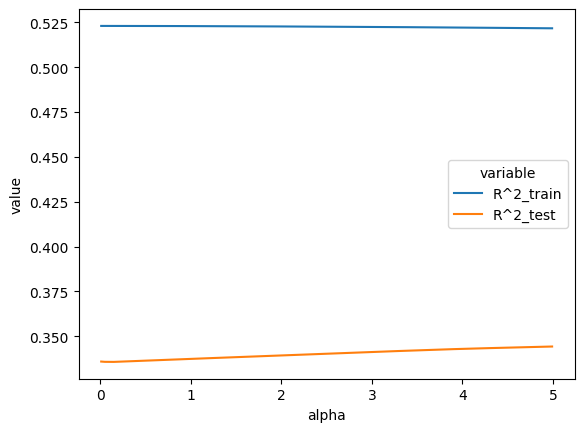

In [58]:
r2 = sns.lineplot(
    x="alpha",
    y="value",
    data=pd.melt(
        lasso_results, ["alpha"], ["R^2_train", "R^2_test"]
    ),
    legend="full",
    hue="variable",
)

Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [ ]:
alpha_vals = np.arange(0.1, 200, 1)

In [ ]:
# pd.DataFrame({'linreg': linreg.coef_, 'lasso': clf.coef_}).head(10)


Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work